In [16]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
%pip install basemap
%pip install pyproj==1.9.6

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get
Note: you may need to restart the kernel to use updated packages.
  Using cached pyproj-1.9.6.tar.gz (2.8 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [407 lines of output]
      using bundled proj4..
      executing /private/var/folders/jj/lym056hx4f13hv_jw4ytgmrm0000gn/T/pip-install-mibdm6ri/pyproj_e87d0298de4e4f639d8a00efa2f172dd/nad2bin lib/pyproj/data/TN < datumgrid/TN.lla
      Output Binary File Format: ctable2
      executing /private/var/folders/jj/lym056hx4f13hv_jw4ytgmrm0000gn/T/pip-install-mibdm6ri/pyproj_e87d0298de4e4f639d8a00efa2f172dd/nad2bin lib/pyproj/data/stlrnc < datumgrid/stlrnc.lla
      Output Binary File Format: ctable2
      executing /private/var/folders/jj/lym056hx4f13hv_jw4ytgmrm0000gn/T/pip-install-mibdm6ri/pyproj_e87d0298de4e4f639d8a00efa2f172dd/nad2bin lib/pyproj/data/h

In [18]:
from sklearn import linear_model
import sklearn
import gzip
import os
from collections import defaultdict
import random
import pandas as pd
from sklearn import linear_model
import dateutil.parser
from datetime import timedelta
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [19]:
path = "./"
os.chdir(path)

In [20]:
with open("Filtered_train.pkl","rb") as fp:
    review_train = pickle.load(fp)

In [21]:
review_train[0]

{'rating': 4.0,
 'reviewerName': 'william spindler',
 'reviewText': 'Best War Wanton soup in Red Bluff',
 'categories': ['Asian Restaurant', 'Chinese Restaurant'],
 'gPlusPlaceId': '106591714648856494903',
 'unixReviewTime': 1394669496,
 'reviewTime': 'Mar 12, 2014',
 'gPlusUserId': '100000032416892623125',
 'gps': [40.179159, -122.236162]}

In [22]:
review_df = pd.DataFrame(review_train)

In [24]:
lat_long = review_df['gps']
lat = [x[0] for x in lat_long if x is not None]
lon = [x[1] for x in lat_long if x is not None]

/var/folders/jj/lym056hx4f13hv_jw4ytgmrm0000gn/T/ipykernel_33655/4083022818.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m.scatter(lon, lat, latlon=True,


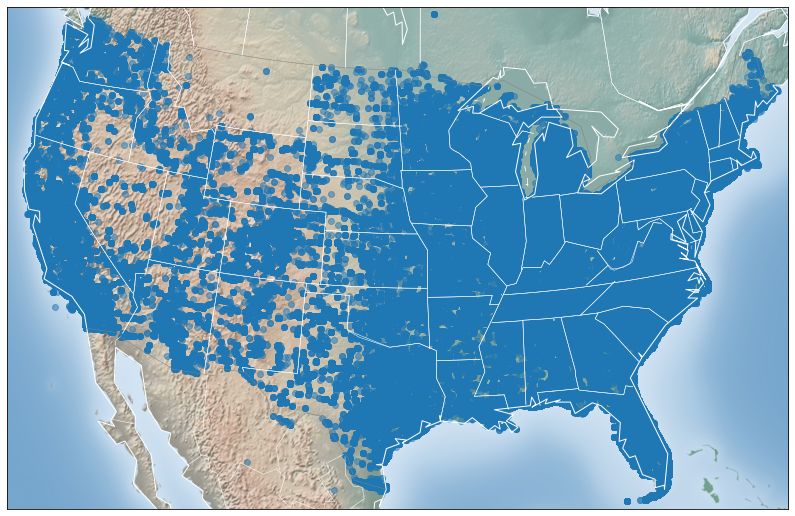

In [ ]:
fig = plt.figure(figsize=(14, 14))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.shadedrelief()
m.drawcoastlines(color='white')
m.drawcountries(color='gray')
m.drawstates(color='white')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)

In [26]:
min_lat = 20
max_lat = 60

min_long = -125
max_long = -60

In [27]:
print(min_lat,max_lat)
print(min_long,max_long)

20 60
-125 -60


In [30]:
def grid_id(lat,lon,lat_lines,long_lines):
  if lat < lat_lines.min() or lat > lat_lines.max() or lon < long_lines.min() or lon > long_lines.max():
    return (-1,-1)
  else:
    grid_lat = lat_lines[np.searchsorted(lat_lines,lat)]
    grid_long = long_lines[np.searchsorted(long_lines,lon)]
    return (grid_lat,grid_long)

In [31]:
lat_lines = np.linspace(min_lat,max_lat,num=max_lat-min_lat +1)
long_lines = np.linspace(min_long,max_long,num=max_long-min_long+1)

import itertools

grid = itertools.product(lat_lines,long_lines)

grid_dict = defaultdict(set)


In [36]:
for d in review_train:
  gps = d['gps']
  if gps is not None:
    tup = grid_id(gps[0],gps[1],lat_lines,long_lines)
    grid_dict[tup].add(d['gPlusPlaceId'])

In [37]:
with open("Grid_dict.pkl","wb") as fp:
    pickle.dump(grid_dict,fp)